# KNN on CIFAR-10 dataset using similarity measure L1 which is Manhattan distance...
### Ameet Kumar Rana, Army Institute Of Technology Pune

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
def load_CIFAR10(path):
    
    train = []
    train_label = []
    test = []
    test_label = []
    
    print("location of training files : ")
    file = 'data_batch_'
    for i in range(5):                                  #reading all training data
        temp = path + '/' + file + str(i+1)
        with open(temp, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
            train.append(dict[b'data'])
            train_label.append(dict[b'labels'])
            print(str(i+1),"  ->  ",temp)
    
    with open(path + '/' + "test_batch", 'rb') as fo:  #reading test data
        dict = pickle.load(fo, encoding='bytes')
        test.append(dict[b'data'])
        test_label.append(dict[b'labels'])
        print("\n\ntest file  ->  ",path + '/' + "test_batch")
     
    train_data = np.array(train)                              #converted list to numpy array
    train_label = np.array(train_label)
    test_data = np.array(test)
    test_label = np.array(test_label)
    
    dictData = {}                                       #final token having train and test data of shape(x,3072)
    
    dictData['train_data'] = np.reshape(train_data, newshape = (train_data.shape[0]*train_data.shape[1],train_data.shape[2]))
    dictData['train_label'] = np.reshape(train_label, newshape = (train_label.shape[0]*train_label.shape[1]))
    dictData['test_data'] = np.reshape(test_data, newshape = (test_data.shape[0]*test_data.shape[1],test_data.shape[2]))
    dictData['test_label'] = np.reshape(test_label, newshape = (test_label.shape[0]*test_label.shape[1]))
    return dictData

In [3]:
#loading the dataset
dataset = load_CIFAR10(path = '/home/sk_sajib/current/knn on CIFAR-10/cifar-10-batches-py')

location of training files : 
1   ->   /home/sk_sajib/current/knn on CIFAR-10/cifar-10-batches-py/data_batch_1
2   ->   /home/sk_sajib/current/knn on CIFAR-10/cifar-10-batches-py/data_batch_2
3   ->   /home//sk_sajib/knn on CIFAR-10/cifar-10-batches-py/data_batch_3
4   ->   /home/sk_sajib/current/knn on CIFAR-10/cifar-10-batches-py/data_batch_4
5   ->   /home/sk_sajib/current/knn on CIFAR-10/cifar-10-batches-py/data_batch_5


test file  ->   /home/sk_sajib/current/knn on CIFAR-10/cifar-10-batches-py/test_batch


In [4]:
dataset['train_data'].shape #cheking shapes of all the entries in the dictionary

(50000, 3072)

In [5]:
dataset['train_label'].shape

(50000,)

In [6]:
dataset['test_data'].shape

(10000, 3072)

In [7]:
dataset['test_label'].shape

(10000,)

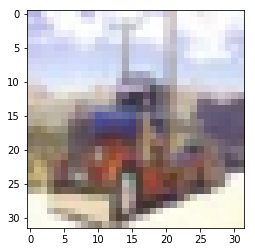

In [8]:
#cheking of any random data images from training data
temp_ran = dataset['train_data'][118]

r = temp_ran[0:1024].reshape(32,32)
g = temp_ran[1024:2048].reshape(32,32)
b = temp_ran[2048:3072].reshape(32,32)

final_image = np.dstack((r,g,b))        #Stacking all the three channels which are R,G and B
plt.imshow(final_image)
plt.show()

In [9]:
x_train = dataset['train_data']
y_train = dataset['train_label']
x_test = dataset['test_data']
y_test = dataset['test_label']

In [10]:
#creating one set of data for validation

train_x , train_y = x_train[0:49000] , y_train[0:49000]

val_x , val_y = x_train[49000:] , y_train[49000:]        #for validation

print("\nSize of test set       : ",train_x.shape[0])
print("Size of validation set : ",val_x.shape[0])


Size of test set       :  49000
Size of validation set :  1000


In [11]:
#main classifier ------> knn

class KNearestNeighbor(object):
    
    def __init__(self):                #for people using other languages can relate it with constructor
        pass
    
    def train(self,Xtr,Ytr):           #assigned numpy array to instance of the class
        self.Xtr = Xtr
        self.Ytr = Ytr
    
    def predictL1(self,X,k):             #function to predict the class of all the numpy array image passed with value of k
                                       #X = testing array , K = hyper-parameter 
        total_samples = X.shape[0]     #total number of images we need to classify
        
        y_pred = np.zeros(total_samples, dtype = self.Ytr.dtype)   #initializing the array which will store final results
        
        for i in range(total_samples):
            
            label_count = np.zeros(10, dtype = self.Ytr.dtype)     #array with size 10. The value will highest count in 
                                                                   # the end will decide that in which class image belongs to 
            
            dist = np.sum(np.abs(X[i,:] - self.Xtr), axis = 1)     #array of distances with all data in training set
                                                                   # here we have stored Manhattan distance which is
                                                                   # taking the absolute difference horizontly across columns
            
            idx = np.argpartition(dist,k)                      #It will perform partial sorting 
                                                               #It means it will store k smallest elements in the 
                                                               # starting k indices
            
            min_ind = idx[:k]                                  #stored the first k elements
            
            for x in min_ind:                                  #running the loop k times
                label_count[int(self.Ytr[x])] += 1             #increases the count of the repeating label
            y_pred[i] = np.argmax(label_count)                 #image is finally classified into the class with maximum count
        
        return y_pred

In [12]:
#creating instance of the class and assigning the data to the instance
knn = KNearestNeighbor()
knn.train(train_x,train_y)

### Validating with different values of hyper-parameter k

In [13]:
#for K = 1 with L1 
val_y_pred = knn.predictL1(val_x,1)

#Accuracy obtained 
print("Accuracy with K = 1: ",np.mean(val_y_pred == val_y))

Accuracy with K = 1:  0.27


In [14]:
#for K = 3 with L1 
val_y_pred = knn.predictL1(val_x,3)

#Accuracy obtained
print("Accuracy with K = 3: ",np.mean(val_y_pred == val_y))

Accuracy with K = 3:  0.253


In [15]:
#for K = 5 with L1 
val_y_pred = knn.predictL1(val_x,5)

#Accuracy obtained
print("Accuracy with K = 5: ",np.mean(val_y_pred == val_y))

Accuracy with K = 5:  0.274


In [17]:
#for K = 7 with L1 
val_y_pred = knn.predictL1(val_x,7)

#Accuracy obtained
print("Accuracy with K = 7: ",np.mean(val_y_pred == val_y))

Accuracy with K = 7:  0.281


In [18]:
#for K = 9 with L1 
val_y_pred = knn.predictL1(val_x,9)

#Accuracy obtained
print("Accuracy with K = 9: ",np.mean(val_y_pred == val_y))

Accuracy with K = 9:  0.273


## NOTE : 
For all the values of k that we have tested in classifier with L1 which is with the manhattan distance gives the best accuracy with k = 7

### Finally checking accuracy on test with K = 7

In [19]:
#for K = 7 with L1 
test_y_pred = knn.predictL1(x_test,7)

#Accuracy obtained
print("Accuracy : ",np.mean(test_y_pred == y_test))

Accuracy :  0.2781
